In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/bro_pope/dataset/my project data.xlsx')

In [ ]:
dataset.head()

,House Location,Price,Agent no,Amenities,Property type,House Image
0,NNPC FELELE,170000,8146545794,Water and Electricity,SELF CONTAINED,image 1.jpg
1,MOTEL 5 FELELE,65000,8146545794,Water and Electricity,SINGLE ROOM,image 2.jpg
2,OWORO FELELE,50000,8146545794,Water and Electricity,SINGLE ROOM,image 3.jfif
3,OWORO FELELE,55000,8146545794,Water and Electricity,SINGLE ROOM,image 3.jpg
4,FELELE,75000,8134845479,Water and Electricity,SELF CONTAINED,image 5.jpg


In [ ]:
dataset.shape

(159, 6)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   House Location  159 non-null    object
 1   Price           159 non-null    int64 
 2   Agent no        159 non-null    int64 
 3   Amenities       159 non-null    object
 4   Property type   159 non-null    object
 5   House Image     159 non-null    object
dtypes: int64(2), object(4)
memory usage: 7.6+ KB


In [ ]:
dataset.columns

Index(['House Location', 'Price', 'Agent no', 'Amenities', 'Property type',
       'House Image'],
      dtype='object')

In [ ]:
dataset = dataset[['House Location', 'Price', 'Agent no', 'Amenities', 'Property type','House Image']]

In [ ]:
dataset.head(3)

,House Location,Price,Agent no,Amenities,Property type,House Image
0,NNPC FELELE,170000,8146545794,Water and Electricity,SELF CONTAINED,image 1.jpg
1,MOTEL 5 FELELE,65000,8146545794,Water and Electricity,SINGLE ROOM,image 2.jpg
2,OWORO FELELE,50000,8146545794,Water and Electricity,SINGLE ROOM,image 3.jfif


In [ ]:
# MISSING VALUES

In [ ]:
dataset.isnull().sum()

House Location    0
Price             0
Agent no          0
Amenities         0
Property type     0
House Image       0
dtype: int64

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

House Location    0
Price             0
Agent no          0
Amenities         0
Property type     0
House Image       0
dtype: int64

In [ ]:
dataset.duplicated().sum()

15

In [ ]:
dataset = dataset.rename(columns={'House Location':'House_Location', 'Property type':'Property_type', 'Agent no':'Agent_no',
       'House Image':'House_Image'})

In [ ]:
dataset.iloc[0].Price

170000

In [ ]:
dataset['House_Location'].unique()


array(['NNPC FELELE', 'MOTEL 5 FELELE', 'OWORO FELELE', 'FELELE',
       'ADANKOLO', 'CRUSHER', 'FELELE ', 'NASFAT FELELE', '`FELELE'],
      dtype=object)

In [ ]:
# Label Encode Ordinal Variables
category_mapping = {
       'NNPC FELELE':'nnpc felele', 'MOTEL 5 FELELE':'motel 5 felele', 'OWORO FELELE':'oworo felele', 'FELELE':'felele',
       'ADANKOLO':'adankolo', 'CRUSHER':'crusher', 'FELELE ':'felele', 'NASFAT FELELE':'nasfat felele', '`FELELE':'felele'
}

dataset['House_Location']= dataset['House_Location'].map(category_mapping)

In [ ]:
dataset['House_Location'].unique()

array(['nnpc felele', 'motel 5 felele', 'oworo felele', 'felele',
       'adankolo', 'crusher', 'nasfat felele'], dtype=object)

In [ ]:
dataset.head(1)

,House_Location,Price,Agent_no,Amenities,Property_type,House_Image
0,nnpc felele,170000,8146545794,Water and Electricity,SELF CONTAINED,image 1.jpg


In [ ]:
dataset['House_Location1'] = dataset['House_Location'].apply(lambda x:x.split())
dataset['Property_type1'] = dataset['Property_type'].apply(lambda x:x.split())
dataset['Amenities1'] = dataset['Amenities'].apply(lambda x:x.split())

In [ ]:
dataset['House_Location'] = dataset['House_Location'].apply(lambda x:x.lower())
dataset['Property_type'] = dataset['Property_type'].apply(lambda x:x.lower())
dataset['Amenities'] = dataset['Amenities'].apply(lambda x:x.lower())

In [ ]:
dataset.columns

Index(['House_Location', 'Price', 'Agent_no', 'Amenities', 'Property_type',
       'House_Image', 'House_Location1', 'Property_type1', 'Amenities1'],
      dtype='object')

In [ ]:
# dataset['tags'] = dataset.apply(lambda row: [row['House_Location1'], row['Price'], row['Amenities1'], row['Property_type1']], axis=1)

In [ ]:
dataset['tags'] = dataset.apply(lambda row: [row['House_Location1'], row['Price'], row['Amenities1'], row['Property_type1']], axis=1).apply(lambda x: " ".join(map(str, x))).str.replace('[','').str.replace(']','')

<ipython-input-305-4fcd780c4f07>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['tags'] = dataset.apply(lambda row: [row['House_Location1'], row['Price'], row['Amenities1'], row['Property_type1']], axis=1).apply(lambda x: " ".join(map(str, x))).str.replace('[','').str.replace(']','')


In [ ]:
dataset.head(1)

,House_Location,Price,Agent_no,Amenities,Property_type,House_Image,House_Location1,Property_type1,Amenities1,tags
0,nnpc felele,170000,8146545794,water and electricity,self contained,image 1.jpg,"[nnpc, felele]","[SELF, CONTAINED]","[Water, and, Electricity]","'nnpc', 'felele' 170000 'Water', 'and', 'Elect..."


In [ ]:
dataset.iloc[0].tags

"'nnpc', 'felele' 170000 'Water', 'and', 'Electricity' 'SELF', 'CONTAINED'"

In [ ]:
new = dataset.drop(columns=['House_Location1', 'Property_type1', 'Amenities1'])

In [ ]:
new.head(2)

,House_Location,Price,Agent_no,Amenities,Property_type,House_Image,tags
0,nnpc felele,170000,8146545794,water and electricity,self contained,image 1.jpg,"'nnpc', 'felele' 170000 'Water', 'and', 'Elect..."
1,motel 5 felele,65000,8146545794,water and electricity,single room,image 2.jpg,"'motel', '5', 'felele' 65000 'Water', 'and', '..."


In [ ]:
new['tags'] = new['tags'].apply(lambda x:x.lower())

In [ ]:
new.head(2)

,House_Location,Price,Agent_no,Amenities,Property_type,House_Image,tags
0,nnpc felele,170000,8146545794,water and electricity,self contained,image 1.jpg,"'nnpc', 'felele' 170000 'water', 'and', 'elect..."
1,motel 5 felele,65000,8146545794,water and electricity,single room,image 2.jpg,"'motel', '5', 'felele' 65000 'water', 'and', '..."


In [ ]:
new.iloc[0].tags

"'nnpc', 'felele' 170000 'water', 'and', 'electricity' 'self', 'contained'"

In [ ]:
import nltk

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()

In [ ]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
new['tags'] = new['tags'].apply(stem)

In [ ]:
new.head(2)

,House_Location,Price,Agent_no,Amenities,Property_type,House_Image,tags
0,nnpc felele,170000,8146545794,water and electricity,self contained,image 1.jpg,"'nnpc', 'felele' 170000 'water', 'and', 'elect..."
1,motel 5 felele,65000,8146545794,water and electricity,single room,image 2.jpg,"'motel', '5', 'felele' 65000 'water', 'and', '..."


In [ ]:
# counter vectorizing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features = 5000, stop_words='english')

In [ ]:
vector = cv.fit_transform(new['tags']).toarray()

In [ ]:
vector

array([[0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(vector)

In [ ]:
similarity

array([[1.        , 0.42857143, 0.42857143, ..., 0.6172134 , 0.77151675,
        0.57142857],
       [0.42857143, 1.        , 0.71428571, ..., 0.3086067 , 0.46291005,
        0.71428571],
       [0.42857143, 0.71428571, 1.        , ..., 0.3086067 , 0.46291005,
        0.71428571],
       ...,
       [0.6172134 , 0.3086067 , 0.3086067 , ..., 1.        , 0.66666667,
        0.3086067 ],
       [0.77151675, 0.46291005, 0.46291005, ..., 0.66666667, 1.        ,
        0.46291005],
       [0.57142857, 0.71428571, 0.71428571, ..., 0.3086067 , 0.46291005,
        1.        ]])

In [ ]:
similarity[0]

array([1.        , 0.42857143, 0.42857143, 0.42857143, 0.77151675,
       0.6172134 , 0.3086067 , 0.6172134 , 0.3086067 , 0.46291005,
       0.77151675, 0.46291005, 0.3086067 , 0.46291005, 0.46291005,
       0.71428571, 0.46291005, 0.46291005, 0.77151675, 0.71428571,
       0.46291005, 0.3086067 , 0.42857143, 0.42857143, 0.42857143,
       0.46291005, 0.46291005, 0.3086067 , 0.77151675, 0.77151675,
       0.6172134 , 0.3086067 , 0.71428571, 0.9258201 , 0.6172134 ,
       0.6172134 , 0.3086067 , 0.85714286, 0.85714286, 0.85714286,
       0.77151675, 0.77151675, 0.71428571, 0.77151675, 0.77151675,
       0.77151675, 0.77151675, 0.77151675, 0.77151675, 0.77151675,
       0.77151675, 0.77151675, 0.77151675, 0.77151675, 0.77151675,
       0.77151675, 0.77151675, 0.71428571, 0.42857143, 0.77151675,
       0.71428571, 0.85714286, 0.77151675, 0.77151675, 0.77151675,
       0.77151675, 0.77151675, 0.46291005, 0.77151675, 0.77151675,
       0.71428571, 0.85714286, 0.77151675, 0.71428571, 0.77151

In [ ]:
len(similarity[0])

159

In [ ]:
new.columns

Index(['House_Location', 'Price', 'Agent_no', 'Amenities', 'Property_type',
       'House_Image', 'tags'],
      dtype='object')

In [ ]:
columns =['House_Location', 'Price', 'Agent_no', 'Amenities', 'Property_type',
       'House_Image', 'tags']

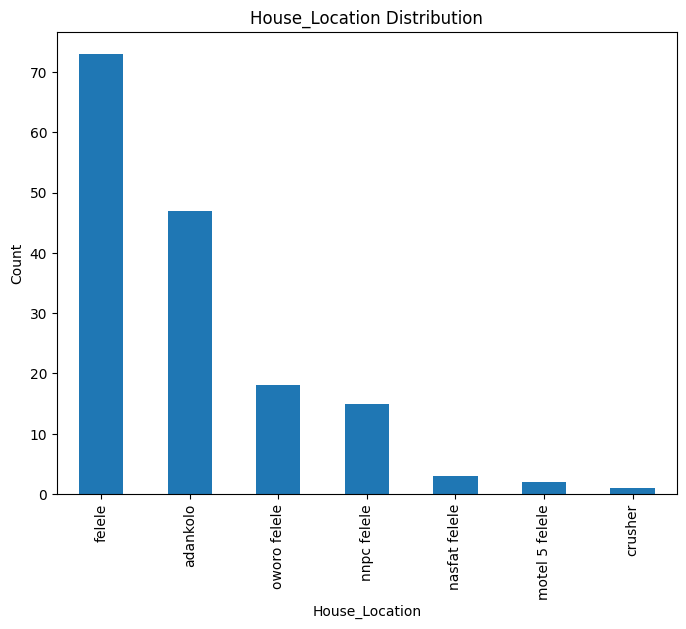

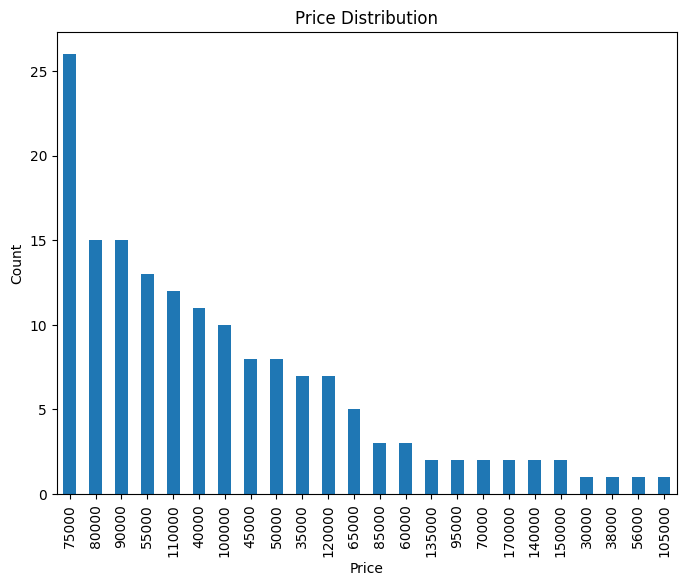

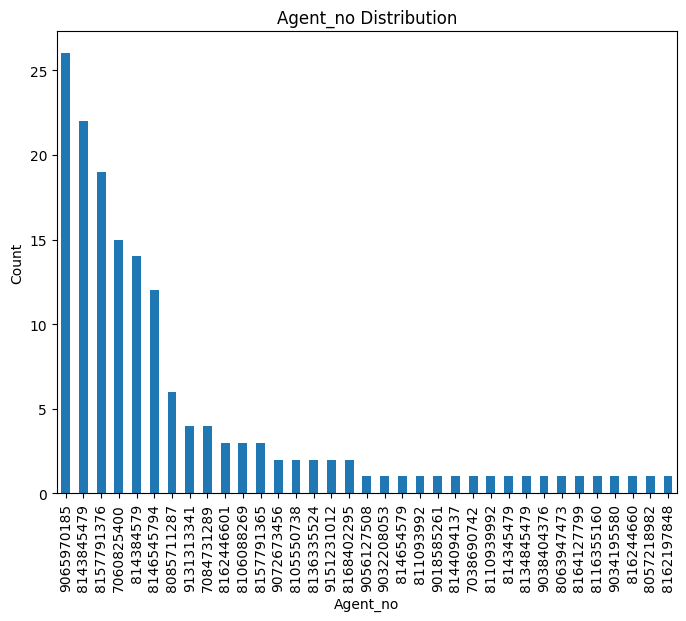

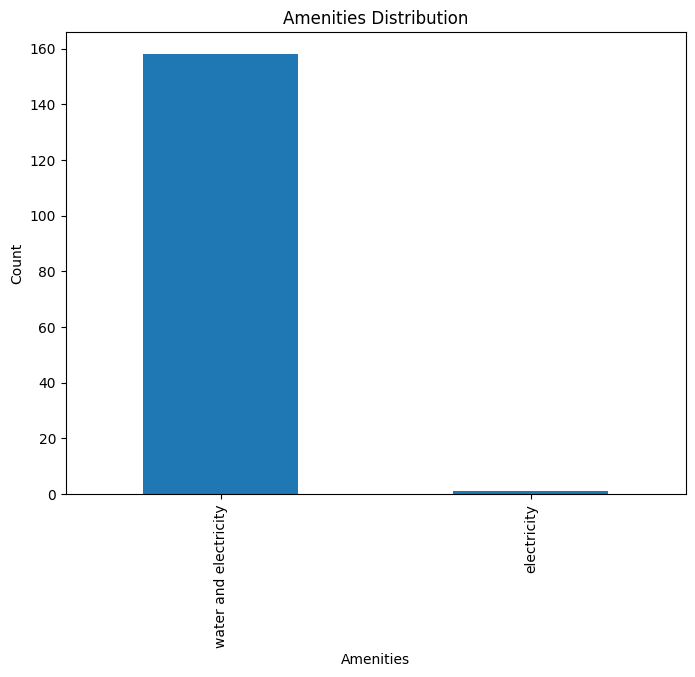

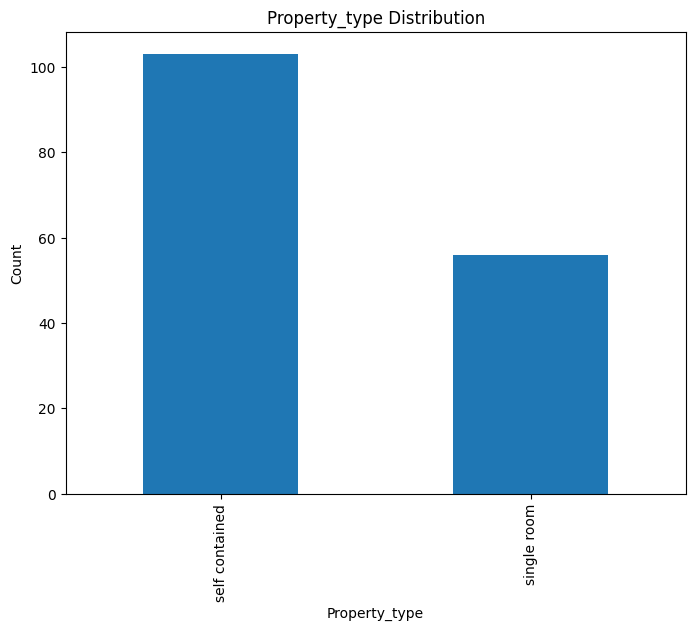

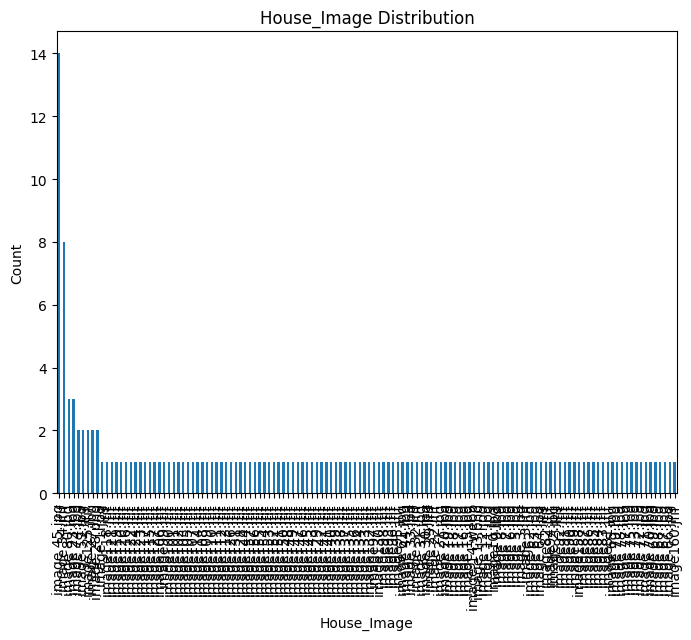

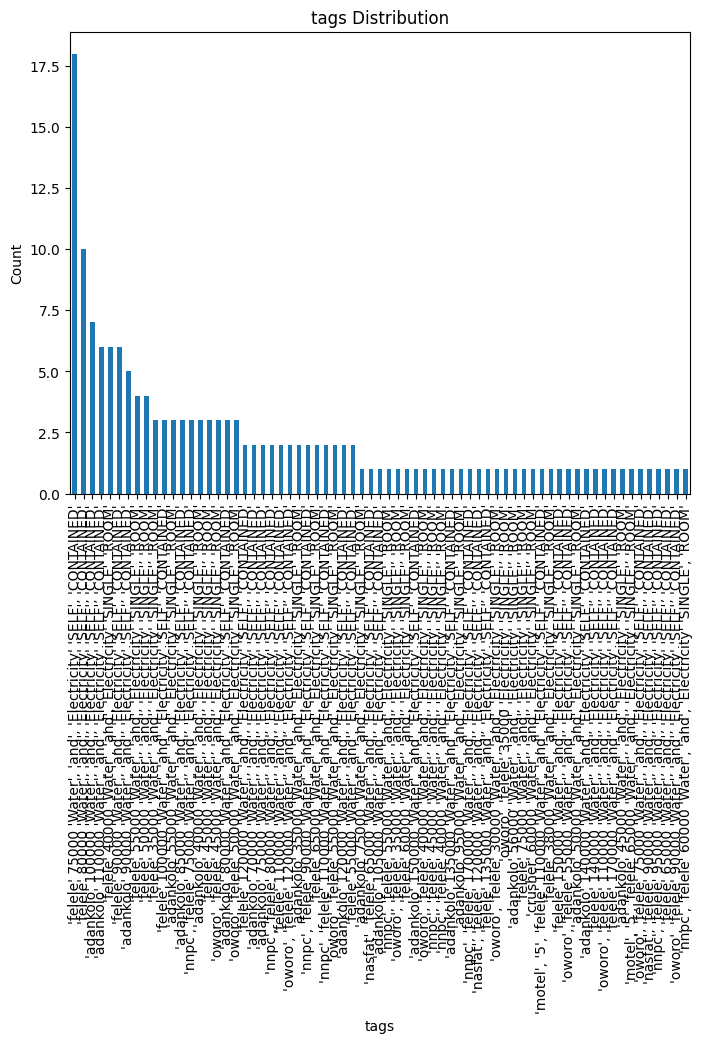

In [ ]:
for column in columns:
    plt.figure(figsize=(8, 6))
    dataset[column].value_counts().plot(kind='bar')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [ ]:
new['House_Location'].unique()

array(['nnpc felele', 'motel 5 felele', 'oworo felele', 'felele',
       'adankolo', 'crusher', 'nasfat felele'], dtype=object)

In [ ]:
# Label Encode Ordinal Variables
category_mapping = {
       'nnpc felele':'nnpc felele', 'motel 5 felele':'motel 5 felele', 'oworo felele':'oworo felele', 'felele':'felele',
       'adankolo':'adankolo', 'crusher':'crusher', 'felele ':'felele', 'nasfat felele':'nasfat felele', '`felele':'felele'
}

new['House_Location']= new['House_Location'].map(category_mapping)

In [ ]:
new['Amenities'].unique()

array(['water and electricity', 'electricity'], dtype=object)

In [ ]:
new['Agent_no'].unique()

array([8146545794, 8134845479, 8162446601,  814654579,  811093992,
       9018585261, 8106088269, 8168402295, 7084731289, 8143845479,
       9032208053, 9065970185, 8116355160, 9034195580, 8157791365,
        816244660, 9056127508, 9151231012, 8057218982,  814384579,
       8136335524, 8105550738, 8164127799, 8063947473, 9038404376,
        814345479, 9072673456, 9131313341, 8110939992, 7038690742,
       8144094137, 8157791376, 8085711287, 7060825400, 8162197848])

In [ ]:
House_Location="nnpc felele"
Price =170000
Amenities ="water and electricity"
Property_type ="self contained"
index = new[(new['House_Location']==House_Location) & (new['Price']==Price) & (new['Amenities']==Amenities) & (new['Property_type']==Property_type)].index[0]

In [ ]:
def recommend(House_Location,Price,Amenities,Property_type):
    index = new[(new['House_Location']==House_Location) & (new['Price']==Price) & (new['Amenities']==Amenities) & (new['Property_type']==Property_type)].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommended_lodges = []
    printed_names = set()
    for i in distances[1:10]:
        row_index = i[0]
        House_Location = new.iloc[row_index]['House_Location']
        Price = new.iloc[row_index]['Price']
        Amenities = new.iloc[row_index]['Amenities']
        Property_type = new.iloc[row_index]['Property_type']
        House_Image = new.iloc[row_index]['House_Image']
        Agent_no = new.iloc[row_index]['Agent_no']
        if House_Location not in printed_names:
            printed_names.add(House_Location)

            recommended_lodges.append(
                {'House_Location': House_Location, 'Price': Price, 'Amenities': Amenities, Agent_no:'Agent_no', 'House_Image':House_Image })
    return recommended_lodges

In [ ]:
recommend("nnpc felele",170000,"water and electricity","self contained")

[{'House_Location': 'felele',
  'Price': 170000,
  'Amenities': 'water and electricity',
  8143845479: 'Agent_no',
  'House_Image': 'image 33.jpg'},
 {'House_Location': 'nnpc felele',
  'Price': 75000,
  'Amenities': 'water and electricity',
  8157791365: 'Agent_no',
  'House_Image': 'image 34.jfif'}]

In [ ]:
sorted(list(enumerate(similarity[0])), reverse=True, key = lambda x:x[1])

[(0, 0.9999999999999997),
 (33, 0.9258200997725515),
 (37, 0.8571428571428569),
 (38, 0.8571428571428569),
 (39, 0.8571428571428569),
 (61, 0.8571428571428569),
 (71, 0.8571428571428569),
 (78, 0.8571428571428569),
 (79, 0.8571428571428569),
 (80, 0.8571428571428569),
 (146, 0.8571428571428569),
 (154, 0.8571428571428569),
 (4, 0.7715167498104596),
 (10, 0.7715167498104596),
 (18, 0.7715167498104596),
 (28, 0.7715167498104596),
 (29, 0.7715167498104596),
 (40, 0.7715167498104596),
 (41, 0.7715167498104596),
 (43, 0.7715167498104596),
 (44, 0.7715167498104596),
 (45, 0.7715167498104596),
 (46, 0.7715167498104596),
 (47, 0.7715167498104596),
 (48, 0.7715167498104596),
 (49, 0.7715167498104596),
 (50, 0.7715167498104596),
 (51, 0.7715167498104596),
 (52, 0.7715167498104596),
 (53, 0.7715167498104596),
 (54, 0.7715167498104596),
 (55, 0.7715167498104596),
 (56, 0.7715167498104596),
 (59, 0.7715167498104596),
 (62, 0.7715167498104596),
 (63, 0.7715167498104596),
 (64, 0.7715167498104596),
 

In [ ]:
import pickle

In [ ]:
pickle.dump(similarity, open('lodgesimilarity.pkl','wb'))

In [ ]:
new.to_csv('lodge_list.csv', index=False)